# Résolution d'équations non linéaires

Importation des packages de calcul scientifique pour Python 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

Dans ce TP, on va mettre en oeuvre les méthodes vues en cours pour la résolution d'équations non linéaires du type

$$
F(x) = 0,
$$

où $F$ est une fonction de $\mathbb{R}$ dans $\mathbb{R}$. Ces méthodes sont au nombre de 3: la méthode de dichotomie, la méthode du point fixe et la méthode de Newton. Nous allons nous intéresser au cas où la fonction $F$ est donnée par

$$
F(x) = 10^{-1}x^2 - \cos(x/2)-e^{-x/4}.
$$

## Graphe de $F$ et localisation grossière des racines

Afin de se faire une idée de la fonction (et de ses racines), on se propose tout d'abord de tracer le graphe de $F$. Pour cela, on commence par implémenter la fonction $F$ qui prendra en entrée un vecteur $x$ et donnera en sortie un vecteur $y$ de même taille que $x$ et tel que, pour tout indice $k$,

$$
y_k = F(x_k).
$$

Ensuite, on trace le graphe de $F$ à l'aide de la fonction `plt.plot` sur l'intervalle $[-10,10]$ avec un millier de points.

> **À faire **: Implémenter la fonction $F$ et tracer son graphe. Donner un intervalle de longueur $1$ autour de chaque racine $F$ dans l'intervalle $[-10,10]$.

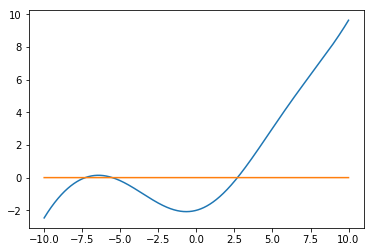

In [39]:
def F(x):
    return pow(x,2)/10.0-np.cos(x/2.0)-np.exp(-x/4.0)

vals = []
absi =[]
zero= []

for i in range(-10000,10000,2):
    absi.append(i/1000.0)
    vals.append(F(i/1000.0))
    zero.append(0)
    
plt.plot(absi, vals)
plt.plot(absi, zero)
    


> **Réponse **: Une entre -8 et -7, une entre -6 et -5 et entre 2 et 3

## Méthode de dichotomie

On passe maintenant au calcul de racines par la méthode de dichotomie. Pour cela, on va implémenter une fonction `Dichotomie` qui aura comme arguments d'entrée:

- une fonction `F` dont on cherche une racine,
- un scalaire `a` et un scalaire `b` pour définir l'intervalle initial,
- un scalaire `eps` pour le critère d'arrêt (qui aura, par défaut, la valeur $10^{-10}$),
- un entier `itermax` pour le nombre maximal d'itérations (qui aura, par défaut, la valeur $100$),

et comme arguments de sortie:

- un vecteur `X` qui contient la suite $(x_k)_{0\leq j\leq k}$ construite par la méthode et dont le dernier élément est l'approximation d'une racine de `F`,
- un entier `k` correspondant au nombre total d'itérations réalisées.

> **À faire **: Implémenter la méthode de la dichotomie. Tester celle-ci sur la fonction $F$ avec comme intervalle initial $[-10,10]$ puis calculer la plus grande racine de $F$ sur l'intervalle $[-10,10]$ à une précision de $10^{-12}$.

In [43]:
def Dichotomie(F, a, b, eps = 1e-10, itermax = 100):
    fa= F(a)
    fb= F(b)
    k = 0
    X = []
    while (k<itermax and abs(b-a)>2*eps):
        c = (a+b)/2.0
        fc = F(c)
        if(fa*fc)<0:
            b = c
            fb= fc
            X.append(b)
        else:
            a=c
            fa=fc
            X.append(a)        
        k+=1
        
    return X,k

(X,k) = Dichotomie(F, -10, 10);
print(X)
print(k)
print(F(X[k-1]))

[0.0, 5.0, 2.5, 3.75, 3.125, 2.8125, 2.65625, 2.734375, 2.6953125, 2.71484375, 2.705078125, 2.7001953125, 2.69775390625, 2.698974609375, 2.6995849609375, 2.69927978515625, 2.699127197265625, 2.6992034912109375, 2.6992416381835938, 2.699260711669922, 2.699270248413086, 2.699275016784668, 2.699277400970459, 2.6992762088775635, 2.6992756128311157, 2.699275314807892, 2.699275463819504, 2.699275389313698, 2.699275426566601, 2.6992754451930523, 2.699275454506278, 2.699275459162891, 2.6992754614911973, 2.6992754626553506, 2.699275462073274, 2.6992754617822357, 2.699275461927755]
37
9.83941816912e-11


## Méthode du point fixe

À présent, on va implémenter la méthode du point fixe. On implémentera pour cela une fonction `Point_fixe` qui aura comme arguments d'entrée:
- une fonction `F` dont on cherche une racine,
- un scalaire `x_0` correspondant à la valeur initial de la méthode,
- un scalaire `M` qui vérifie: $0<F'<M$ lorsque $F$ est croissante (et $M<F'<0$ lorsque $F$ est décroissante) près de la racine recherchée, 
- un scalaire `eps` pour le critère d'arrêt (qui aura, par défaut, la valeur $10^{-10}$),
- un entier `itermax` pour le nombre maximal d'itérations (qui aura, par défaut, la valeur $100$),

et comme arguments de sortie:

- un vecteur `X` qui contient la suite $(x_k)_{0\leq j\leq k}$ construite par la méthode et dont le dernier élément est l'approximation d'une racine de `F`,
- un entier `k` correspondant au nombre total d'itérations réalisées.

> **À faire **: Implémenter la méthode du point fixe.

In [98]:
def Point_fixe(F, M, x_0, eps = 1e-10, itermax = 100):
    x1 = x_0
    x2 = x_0
    crit = 2*eps
    X = []
    k = 0
    while(crit>eps) and (k<itermax):
        x1 = x2
        if(M>0):
            x2 = x2 - (F(x2)/(M))
        else :
            x2 = x2 + (F(x2)/(-M))
        X.append(x2)
        k += 1
        if x1 != 0:
            crit = abs(x2-x1)/abs(x1)
    return X,k

> **À faire **: Calculer la dérivée de la fonction $F$ et implémenter sous une fonction `Fp`. Ensuite, tester la méthode du point fixe sur la fonction $F$ avec comme valeur initiale $0$. Pour évaluer le paramètre `M`, on calculera (de manière approximative) au préalable la valeur maximale de `Fp` sur l'intervalle $[0,5]$.

In [99]:
def Fp(x):
    return 1/5.0*x+1/2.0*np.sin(x/2.0)+1/4.0*np.exp(-x/4.0)

M = F(0);
for i in range(0,5000):
    if Fp(i/1000.0)>M:
        M = Fp(i/1000.0)
        
print(M)

(X, k) = Point_fixe(F, M, 0.0)
print(X)
print(k)
print(F(X[k-1]))

1.37309281875
[1.456565770855514, 2.3515911529094691, 2.6336584719145373, 2.6884992382890491, 2.6975543068073873, 2.6990018310300004, 2.6992319919403349, 2.6992685568816515, 2.6992743650470463, 2.6992752876262505, 2.6992754341698495, 2.6992754574469995, 2.6992754611443677, 2.6992754617316619, 2.6992754618249482]
15
-2.03463912385e-11


## Méthode de Newton

On passe enfin à la méthode de Newton. On implémentera pour cela une fonction `Newton` qui aura comme arguments d'entrée:
- une fonction `F` dont on cherche une racine,
- une fonction `Fp` qui correspond à la dérivée de `F`,
- un scalaire `x_0` correspondant à la valeur initial de la méthode,
- un scalaire `eps` pour le critère d'arrêt (qui aura, par défaut, la valeur $10^{-10}$),
- un entier `itermax` pour le nombre maximal d'itérations (qui aura, par défaut, la valeur $100$),

et comme arguments de sortie:

- un vecteur `X` qui contient la suite $(x_k)_{0\leq j\leq k}$ construite par la méthode et dont le dernier élément est l'approximation d'une racine de `F`,
- un entier `k` correspondant au nombre total d'itérations réalisées.

> **À faire **: Implémenter la méthode de Newton. Tester cette dernière avec comme condition initiale $x_0 = -3$.

In [100]:
def Newton(F, Fp, x_0, eps = 1e-10, itermax = 100):
    k = 0
    X = []
    x1 = x_0
    x2 = 0
    while(k < itermax and abs(x1-x2) > eps*abs(x1)):
        x1 = x2
        x2 = x2 - F(x2)/Fp(x2)
        X.append(x2)
        k+=1
    
    return X,k

(X,k) = Newton(F, Fp, -3.0)
print(X)
print(k)
print(F(X[k-1]))

[8.0, 2.4893031409566584, 2.7040360388114535, 2.6992776442489648, 2.6992754618430239, 2.6992754618425643]
6
1.11022302463e-16


## Comparaison des méthodes

Dans cette dernière section, on va comparer les méthodes et notamment la vitesse de convergence de celle-ci. Tout d'abord, on va calculer chacune des racines de $F$ avec une précision de $10^{-15}$ à l'aide de la méthode de votre choix. On note $x^*_i$ la $i$-ème racine de $F$ obtenue de cette manière. Ensuite, on va tracer l'évolution, pour chaque méthode et pour chaque racine de $F$, de l'erreur:

$$
e_n^{(k)} = \log_{10} (|x_n-x_k^*|),
$$
pour $n$ allant de $0$ jusqu'au nombre total d'itérations de chaque méthode. 


> **À faire **: Tracer, pour chaque racine, l'évolution de $e_n^{(k)}$ pour chaque méthode sur un même graphique. Les conditions initiales seront $x_0 = -7, -5$ et $2$. Pour la méthode de la dichotomie, on commencera avec un intervalle de taille $1$ tel que $a$ ou $b$ est égal à $x_0$. L'évaluation du paramètre $M$ pour la méthode du point fixe se fera sur le même intervalle que l'intervalle de départ de la dichotomie. Le paramètre `eps` sera fixé à $10^{-12}$. Commenter le résultat.

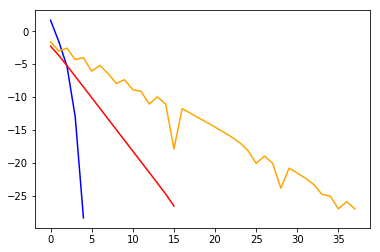

In [107]:
x0 = -7
eps=1e-12
(racines, k) = Newton(F, Fp, x0, eps)
r = racines[k-1]
eN = []
for i in range(0, k-1):
    eN.append(np.log(abs(r-racines[i])))

M = F(0);
n = 0;
for i in range(-8000,-7000):
    M = M+Fp(i/1000.0)
    n+=1.0
 #   if Fp(i/1000.0)>M:
  #      M = Fp(i/1000.0)
M=M/n    

(racines, k) = Point_fixe(F, M, x0, eps)
r = racines[k-1]
eP = []
for i in range(0, k-1):
    eP.append(np.log(abs(r-racines[i]))) 
    
(racines, k) = Dichotomie(F, -8, -7, eps)
r = racines[k-1]
eD = []
for i in range(0, k-1):
    eD.append(np.log(abs(r-racines[i])))

plt.plot(eN, color="blue")
plt.plot(eP, color="red")
plt.plot(eD, color="orange")

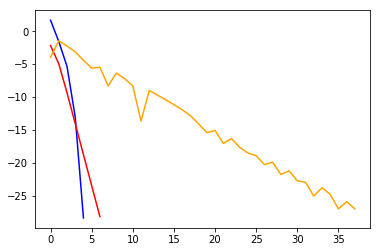

In [102]:
x0 = -5
eps=1e-12
(racines, k) = Newton(F, Fp, x0, eps)
r = racines[k-1]
eN = []
for i in range(0, k-1):
    eN.append(np.log(abs(r-racines[i])))

M = F(0);
n = 0;
for i in range(-6000,-5000):
    M = M+Fp(i/1000.0)
    n+=1.0
 #   if Fp(i/1000.0)>M:
  #      M = Fp(i/1000.0)
M=M/n  
        
(racines, k) = Point_fixe(F, M, x0, eps)
r = racines[k-1]
eP = []
for i in range(0, k-1):
    eP.append(np.log(abs(r-racines[i]))) 
    
(racines, k) = Dichotomie(F, -6, -5, eps)
r = racines[k-1]
eD = []
for i in range(0, k-1):
    eD.append(np.log(abs(r-racines[i])))

plt.plot(eN, color="blue")
plt.plot(eP, color="red")
plt.plot(eD, color="orange")

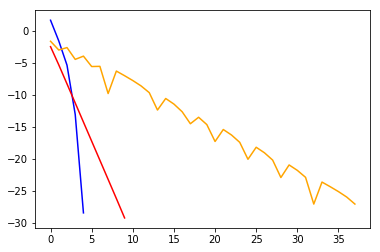

In [103]:
x0 = 2
eps=1e-12
(racines, k) = Newton(F, Fp, x0, eps)
r = racines[k-1]
eN = []
for i in range(0, k-1):
    eN.append(np.log(abs(r-racines[i])))

M = F(0);
n = 0;
for i in range(2500,3000):
    #M = M+Fp(i/1000.0)
    #n+=1.0
    if Fp(i/1000.0)>M:
        M = Fp(i/1000.0)
#M=M/n  
        
(racines, k) = Point_fixe(F, M, x0, eps)
r = racines[k-1]
eP = []
for i in range(0, k-1):
    eP.append(np.log(abs(r-racines[i]))) 
    
(racines, k) = Dichotomie(F, 2, 3, eps)
r = racines[k-1]
eD = []
for i in range(0, k-1):
    eD.append(np.log(abs(r-racines[i])))

plt.plot(eN, color="blue")
plt.plot(eP, color="red")
plt.plot(eD, color="orange")